<p style="background-color:#BCDBF9;color:black;font-size:22px;text-align:center;border-radius:9px 9px;font-weight:bold;border:2px solid blue;">Titanic - Machine Learning from Disaster 🚢🌊</p>

<center><img src="https://github.com/Isharaneranjana/kaggle_gif/blob/main/descriptive%20Analysis%20(1).gif?raw=true" style="width:100%;height:390px;"></center>

##  <p style="background-color:#BCDBF9;color:black;font-size:19px;text-align:center;border-radius:12px 10px;border:2px solid blue;">🧿 Introduction</p>

<font size="4" color="black"> The sinking of the Titanic is one of the most infamous shipwrecks in history. </font>

<font size="4" color="black">On April 15, 1912, during her maiden voyage, the widely considered “unsinkable” RMS Titanic sank after colliding with an iceberg. Unfortunately, there weren’t enough lifeboats for everyone onboard, resulting in the death of 1502 out of 2224 passengers and crew.</font>

<font size="4" color="#01559A">While there was some element of luck involved in surviving, it seems some groups of people were more likely to survive than others. Let's find out the factors which help to survive.</font>

##  <p style="background-color:#BCDBF9;color:black;font-size:19px;text-align:center;border-radius:12px 10px;border:2px solid blue;"> 🏊‍♂️ Objectives</p>

* <p><font size="4" color="blue">Explore the factors which decided the survival of passengers.</font></p>
* <p><font size="4" color="blue"> predict the survival of passengers on Titanic using machine learning and deep learning.</font></p>


## <p style="background-color:#BCDBF9;color:black;font-size:19px;text-align:center;border-radius:12px 10px;border:2px solid blue;"> 🛳  Description of the Dataset </p>


<font size="4">The dataset contains ten variables and 891 passenger details. Survived is the response variable for the study. </font>
<p></p>


<table style="border-collapse: collapse;font-size: 15px; width:800px;">
  <tr>
    <th style="background-color:#D3DBDD;">Variable Name </th>
    <th style="width:500px; background-color:#D3DBDD;">Description</th>
    <th style="background-color:#D3DBDD;">Type</th>
  </tr>
  <tr>
    <td>survival</td>
    <td>Did Survive the incident?</td>
    <td>Categoricol</td>
  </tr>
  <tr>
    <td>pclass </td>
    <td>Class of the ticket</td>
    <td>Categoricol</td>
  </tr>
  <tr>
    <td>sex </td>
    <td>Gender </td>
    <td>Categoricol</td>
  </tr>
  <tr>
    <td>Age </td>
    <td>Age of the passenger</td>
    <td>Numeric</td>
  </tr>
  <tr>
    <td>sibsp </td>
    <td>no of siblings / spouses aboard the Titanic </td>
    <td>Numeric</td>
  </tr>
  <tr>
    <td>parch</td>
    <td>no of parents / children aboard the Titanic</td>
    <td>Numeric</td>
  </tr>
  <tr>
    <td>ticket</td>
    <td>Unique ticket number</td>
    <td>Categoricol</td>
  </tr>
  <tr>
    <td>fare</td>
    <td>Passenger fare </td>
    <td>Numeric</td>
  </tr>
  <tr>
    <td>cabin</td>
    <td>cabin number </td>
    <td>Categoricol</td>
  </tr>
  <tr>
    <td>Embarked</td>
    <td>Port of Embarkation</td>
    <td>Categoricol</td>
  </tr>
</table>


In [1]:
#importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#### 🚤 Loading the ... dataset 

In [2]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
import warnings
warnings.filterwarnings("ignore")

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


In [3]:
train = pd.read_csv('/kaggle/input/titanic/train.csv')
test = pd.read_csv('/kaggle/input/titanic/test.csv')

#### dataset size

In [4]:
print("training set dimensions: ",train.shape)
print("test set dimensions: ",test.shape)

training set dimensions:  (891, 12)
test set dimensions:  (418, 11)


In [5]:
train.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
train.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


#### checking missing values in the training set.

<AxesSubplot:>

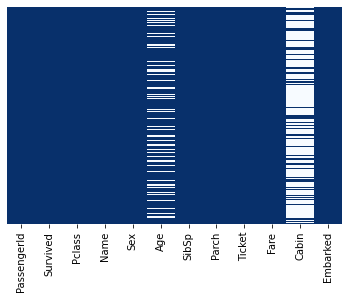

In [8]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap="Blues_r")

<font size="4" color="black"> There are some missing values in the dataset. So we need to remove or impute them.</font>

#### let's check for categorical variables and there categories.

In [9]:
categorical_cols= train.select_dtypes(include=['object'])
print(f'The dataset contains {len(categorical_cols.columns.tolist())} categorical columns')
for cols in categorical_cols.columns:
    print(cols,':', len(categorical_cols[cols].unique()),'labels')

The dataset contains 5 categorical columns
Name : 891 labels
Sex : 2 labels
Ticket : 681 labels
Cabin : 148 labels
Embarked : 4 labels


##  <p style="background-color:#BCDBF9;color:black;font-size:19px;text-align:center;border-radius:12px 10px;border:2px solid blue;"> 📊 Descriptive Analysis </p>

#### some of the important results of descriptive analysis is shown below.All the plots are created using plotly.

#### <u>Univariate Analysis</u>

In [10]:
import plotly.graph_objects as go

night_colors = ['#D3DBDD',  'navy',  '#57A7F3']
labels = [x for x in train.Embarked.value_counts().index]
values = train.Embarked.value_counts()

# Use `hole` to create a donut-like pie chart
fig=go.Figure(data=[go.Pie(labels=["Southampton","Cherbourg","Queenstown"],values=values,hole=.3,pull=[0,0,0.06,0])])

fig.update_layout(
    title_text="Port of embarkation")
fig.update_traces(marker=dict(colors=night_colors))
fig.show()

<font size="4" color="black"> The majority of the passenegers from southampton and least number of passengers from Queenstown.</font>

In [11]:
labels = [x for x in train.Sex.value_counts().index]
values = train.Sex.value_counts()

# Use `hole` to create a donut-like pie chart
fig = go.Figure(data=[go.Pie(labels=labels, values=values, hole=.3,pull=[0.03, 0])])

fig.update_layout(
    title_text="Gender ")
fig.update_traces(marker=dict(colors=night_colors))
fig.show()

<font size="4" color="black"> There were 64.8% male passengers on the ship which is significantly greater than female passengers.</font> 

In [12]:
import plotly.figure_factory as ff
from plotly.offline import iplot
age=train['Age'].dropna()
fig = ff.create_distplot([age],['Age'],bin_size=1,)
fig.update_traces(marker=dict(color='#57A7F3'))
fig.update_layout(
    title="Age Distribution",
)
iplot(fig, filename='Basic Distplot')

<font size="4" color="black"> Age of the passengers are positively skewed and also there were some missing values in this variable.</font>

In [13]:
fig = ff.create_distplot([train['Fare']],['Fare'],bin_size=10)
fig.update_traces(marker=dict(color='#57A7F3'))
fig.update_layout(
    title="Fare Distribution",
)
iplot(fig, filename='Basic Distplot')

<font size="4" color="black"> The distribution of fare is also skewed. we can use log transformation if we want to noramlize these positively skewed distributions.</font>

In [14]:
labels = [x for x in train.Pclass.value_counts().index]
values = train.Pclass.value_counts()

# Use `hole` to create a donut-like pie chart
fig = go.Figure(data=[go.Pie(labels=['class 3','class 1','class 2'], values=values, hole=.3,pull=[0,0,0.04])])

fig.update_layout(
    title_text="Ticket class ")
fig.update_traces(marker=dict(colors=night_colors))
fig.show()

<font size="4" color="black"> The majority of the passengers had bought class 3 tickets and class 2 tickets are the less. </font>

In [15]:
import plotly.offline as py
def PieChart(column, title, limit):
    male = train[train['Sex'] == 'male']
    female = train[train['Sex'] == 'female']
    count_male = male[column].value_counts()[:limit].reset_index()
    count_female = female[column].value_counts()[:limit].reset_index()
    color = ['#D3DBDD','navy','#57A7F3', 'lightgrey','orange', 'gold','lightgreen', 
                            '#D0F9B1','tomato', 'tan']
    
    trace1 = go.Pie(labels=count_male['index'], 
                    values=count_male[column], 
                    name= "male", 
                    hole= .4, 
                    domain= {'x': [0, .48]},
                   marker=dict(colors=color))

    trace2 = go.Pie(labels=count_female['index'], 
                    values=count_female[column], 
                    name="female", 
                    hole= .4,  
                    domain= {'x': [.52, 1]})
    layout = dict(title= title, font=dict(size=13), legend=dict(orientation="h"),
                  annotations = [
                      dict(
                          x=.21, y=.5,
                          text='Male', 
                          showarrow=False,
                          font=dict(size=16)
                      ),
                      dict(
                          x=.80, y=.5,
                          text='Female', 
                          showarrow=False,
                          font=dict(size=16)
                      )
        ])

    fig = dict(data=[trace1, trace2], layout=layout)
    py.iplot(fig)


#### <u> Bivariate analysis </u>

In [16]:
PieChart('Pclass', "Ticket class and gender", 3)

<font size="4" color="black"> These charts show that from the class 1 passengers majority of them are females and the majority of class 3 passengers are males. This may have an effect to the very low number of male survivers.</font>

In [17]:
PieChart('Embarked', "Embarkation and gender", 3)

<font size="4">  The port of embarkation does not have a significant change with gender of the passenger.</font>

In [18]:
train['Survived']=train['Survived'].astype('category')
train['Pclass']=train['Pclass'].astype('category')
train['SibSp']=train['SibSp'].astype('category')

In [19]:
import plotly.express as px

df = train.groupby(by=["Survived", "Sex"]).size().reset_index(name="counts")
px.bar(data_frame=df, x="Sex", y="counts", color="Survived", barmode="group",color_discrete_sequence =['#8FCBD8','#D3DBDD'],title="Survived vs Gender")

<font size="4" color="black"> Out of all the survivers there were many females. this may due to the fact that higher priority given to save the children and women on the ship. and also there would be a high priority to the class 1 passengers. So class of the ticket you are buying will have a significant effect to the survival of tragic incidents.</font>

In [20]:

df = train.groupby(by=["Survived", "Pclass"]).size().reset_index(name="counts")
px.bar(data_frame=df, x="Pclass", y="counts", color="Survived", barmode="group",color_discrete_sequence =['#8FCBD8','#D3DBDD']
      ,title="Survived vs Ticket class")

<font size="4" color="black"> This shows the above mentioned fact of given higher priority to the class 1 passengers. hence there are many survivars from class 1 while there are many who could not survive in class 3.</font>

In [21]:
df = train.groupby(by=["Survived", "Embarked"]).size().reset_index(name="counts")
px.bar(data_frame=df, x="Embarked", y="counts", color="Survived", barmode="group",
       color_discrete_sequence =['#D3DBDD','#8FCBD8'],title="Survived vs Embarkation")

<font size="4" color="black"> Although there is a high percentage of survivers in who's port of embarkation is churbog the no of passengers in churbog is low compared to southampton and also this may happen due to the fact that many in churbog are class 1 passengers.</font>

In [22]:
df = train.groupby(by=["Pclass", "Embarked"]).size().reset_index(name="counts")
px.bar(data_frame=df, x="Embarked", y="counts", color="Pclass", barmode="group",color_discrete_sequence =['navy','#57A7F3','#D3DBDD'],
      title="Ticket class vs Embarkation")

<font size="4" color="black"> This shows the above mentioned fact that churbog has higher number of class 1 passengers compared to other classes.</font>

In [23]:
px.scatter(data_frame = train
           ,x = 'Fare'
           ,y = 'Age'
           ,color = 'Survived',
           size='Parch',
           hover_data=['Sex', 'Age'],
           color_discrete_sequence =['navy','#57A7F3','#D3DBDD'],
           title="Age vs Fare"
           )


In [24]:
df = train.groupby(by=["Survived", "SibSp"]).size().reset_index(name="counts")
px.bar(data_frame=df, x="SibSp", y="counts", color="Survived", barmode="group",color_discrete_sequence =['#D3DBDD','#8FCBD8'],
      title="Survived vs SibSp")

In [25]:
df = train.groupby(by=["Survived", "Parch"]).size().reset_index(name="counts")
px.bar(data_frame=df, x="Parch", y="counts", color="Survived", barmode="group",color_discrete_sequence =['#D3DBDD','#8FCBD8'],
      title="Survived vs Parch")

<font size="4" color="black"> These two graphs shows that higher percentage of passengers without relations on the ship have not survived  while the chance of survival has been higher otherwise. </font>

## <p style="background-color:#BCDBF9;color:black;font-size:19px;text-align:center;border-radius:12px 10px;border:2px solid blue;">⏳ Data Preprocessing </p>

<font size="4" color="black"> First I am droping the name, passenger id and ticket varaibles since they contain uniques values and making dummies for them make the dimensionality high.</font>

In [26]:
train=train.drop(['PassengerId','Name','Ticket'],1)
test=test.drop(['PassengerId','Name','Ticket'],1)

In [27]:
train['Survived']=train['Survived'].astype('int')
train['Pclass']=train['Pclass'].astype('int')
train['SibSp']=train['SibSp'].astype('int')

In [28]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       714 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Cabin     204 non-null    object 
 8   Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(3)
memory usage: 62.8+ KB


<font size="4" color="black"> Let's check the missing value percentages in the dataset now.</font>

In [29]:
features=[features for features in train.columns if train[features].isnull().sum()>1]
for feature in features:
    print(feature, np.round(train[feature].isnull().mean(), 4),  ' % missing values.\n')

Age 0.1987  % missing values.

Cabin 0.771  % missing values.

Embarked 0.0022  % missing values.



<font size="4" color="black"> Cabin variable contain more than 77% missing values hence I will remove that variable but we can impute missing values as "other" by adding another category.</font>

In [30]:
train=train.drop(['Cabin'],1)
test=test.drop(['Cabin'],1)

In [31]:
categorical_cols_train= train.select_dtypes(include=['object'])

print(f'The dataset contains {len(categorical_cols_train.columns.tolist())} categorical columns')

The dataset contains 2 categorical columns


In [32]:
categorical_cols_train.describe()

,Sex,Embarked
count,891,889
unique,2,3
top,male,S
freq,577,644


In [33]:
categorical_cols_missing = categorical_cols_train.columns[categorical_cols_train.isnull().any()]
categorical_cols_missing

Index(['Embarked'], dtype='object')

<font size="4" color="black"> There are only two missing values in Embarked variable hence I will impute it with the mode.</font>

In [34]:
from sklearn.impute import SimpleImputer
categoricalImputer = SimpleImputer(missing_values = np.NaN,strategy = 'most_frequent')
for feature in categorical_cols_missing:
     categorical_cols_train[feature] = categoricalImputer.fit_transform(categorical_cols_train[feature].values.reshape(-1,1))
     train[feature] = categoricalImputer.fit_transform(train[feature].values.reshape(-1,1))

In [35]:
train['Age'].describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

In [36]:
train['Fare'].describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

<font size="4" color="black"> The missing values of age variable are imputed using random values in between the 25th and 75th percentile. In the test set there are missing values for fare variable. Those are also imputed from the values range in the training set.</font>

In [37]:
np.random.seed(1)
train['Age'].fillna(np.random.randint(20,38), inplace = True)
test['Age'].fillna(np.random.randint(20,38), inplace = True)
test['Fare'].fillna(np.random.randint(0,31), inplace = True)

#### The missing values have been treated. let's confirm that.

<AxesSubplot:>

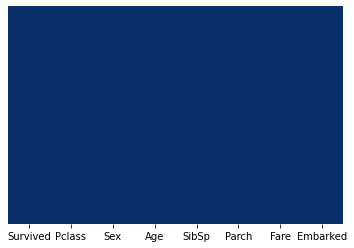

In [38]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap="Blues_r")

In [39]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       891 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  891 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 55.8+ KB


In [40]:
cleanup_nums = {"Sex": {"male": 1, "female": 0}}
train= train.replace(cleanup_nums)
test= test.replace(cleanup_nums)

In [41]:
train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,S
1,1,1,0,38.0,1,0,71.2833,C
2,1,3,0,26.0,0,0,7.9250,S
3,1,1,0,35.0,1,0,53.1000,S
4,0,3,1,35.0,0,0,8.0500,S


In [42]:
train.isnull().any()

Survived    False
Pclass      False
Sex         False
Age         False
SibSp       False
Parch       False
Fare        False
Embarked    False
dtype: bool

<font size="4" color="black"> Create dummy variables for embarked variable.</font>

In [43]:
train=pd.get_dummies(train, columns=["Embarked"])
test=pd.get_dummies(test, columns=["Embarked"])

In [44]:
data = train[[i for i in train.columns if i not in ('Age','SibSp','Parch','Pclass','Fare',)]]

In [45]:
train.shape

(891, 10)

In [46]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   Survived    891 non-null    int64
 1   Sex         891 non-null    int64
 2   Embarked_C  891 non-null    uint8
 3   Embarked_Q  891 non-null    uint8
 4   Embarked_S  891 non-null    uint8
dtypes: int64(2), uint8(3)
memory usage: 16.7 KB


## <p style="background-color:#BCDBF9;color:black;font-size:19px;text-align:center;border-radius:12px 10px;border:2px solid blue;"> 📘 correlations </p>

<font size="4" color="black"> Here I will check the correlations for three parts seperately. that is correlations between numerical and numerical variables, numerical and categorical variables and categorical and categorical variables.</font>

In [47]:
from scipy.stats import chi2_contingency
import numpy as np

def cramers_V(var1,var2):
  crosstab =np.array(pd.crosstab(var1,var2, rownames=None, colnames=None)) # Cross table building
  stat = chi2_contingency(crosstab)[0] # Keeping of the test statistic of the Chi2 test
  obs = np.sum(crosstab) # Number of observations
  mini = min(crosstab.shape)-1 # Take the minimum value between the columns and the rows of the cross table
  return (stat/(obs*mini))

In [48]:
rows= []

for var1 in data:
  col = []
  for var2 in data:
    cramers =cramers_V(data[var1], data[var2]) # Cramer's V test
    col.append(round(cramers,2)) # Keeping of the rounded value of the Cramer's V  
  rows.append(col)
  
cramers_results = np.array(rows)
df = pd.DataFrame(cramers_results, columns = data.columns, index =data.columns)
df

,Survived,Sex,Embarked_C,Embarked_Q,Embarked_S
Survived,1.00,0.29,0.03,0.00,0.02
Sex,0.29,1.00,0.01,0.00,0.01
Embarked_C,0.03,0.01,0.99,0.02,0.61
Embarked_Q,0.00,0.00,0.02,0.99,0.24
Embarked_S,0.02,0.01,0.61,0.24,0.99


#### categorical vs categorical correlation

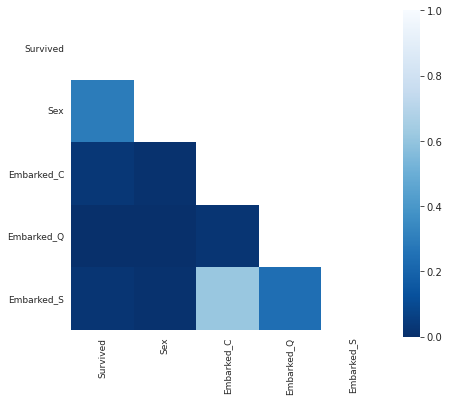

In [49]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(7,6))

mask = np.zeros_like(df, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True


with sns.axes_style("white"):
  ax = sns.heatmap(df, mask=mask,vmin=0., vmax=1, square=True, cmap="Blues_r")
  ax.set_yticklabels(ax.get_ymajorticklabels(), fontsize = 9)
  ax.set_xticklabels(ax.get_xmajorticklabels(), fontsize = 9)
  
plt.show()

In [50]:
pip install dython

Note: you may need to restart the kernel to use updated packages.


#### Categorical vs Numerical correlation

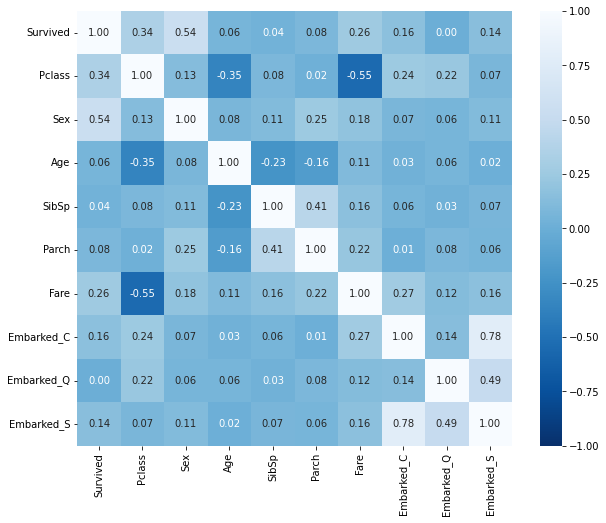

{'corr':             Survived    Pclass       Sex       Age     SibSp     Parch  \
 Survived    1.000000  0.338481  0.540200  0.055927  0.035322  0.081629   
 Pclass      0.338481  1.000000  0.131900 -0.352638  0.083081  0.018443   
 Sex         0.540200  0.131900  1.000000  0.075406  0.114631  0.245489   
 Age         0.055927 -0.352638  0.075406  1.000000 -0.232948 -0.159632   
 SibSp       0.035322  0.083081  0.114631 -0.232948  1.000000  0.414838   
 Parch       0.081629  0.018443  0.245489 -0.159632  0.414838  1.000000   
 Fare        0.257307 -0.549500  0.182333  0.105009  0.159651  0.216225   
 Embarked_C  0.161947  0.243292  0.072515  0.026945  0.059528  0.011069   
 Embarked_Q  0.000000  0.221009  0.061412  0.061896  0.026354  0.081228   
 Embarked_S  0.143309  0.074053  0.111733  0.015346  0.068734  0.060814   
 
                 Fare  Embarked_C  Embarked_Q  Embarked_S  
 Survived    0.257307    0.161947    0.000000    0.143309  
 Pclass     -0.549500    0.243292    0.221009

In [51]:
cat_cols=[]
for c in data.columns:
    cat_cols.append(c)

from dython import nominal
nominal.associations(train, nominal_columns=cat_cols,figsize=(10,8),cmap="Blues_r")

#### Numerical vs Numerical correlation

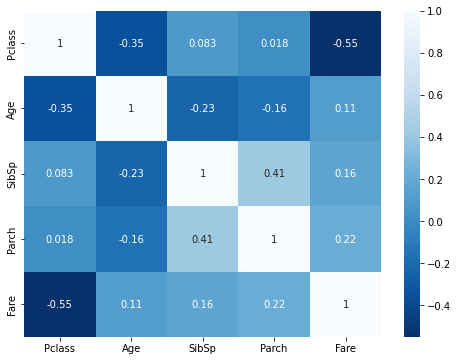

In [52]:
data1 = train[[i for i in train.columns if i in ('Age','SibSp','Parch','Pclass','Fare',)]]
plt.figure(figsize=(8,6))
sns.heatmap(data1.corr(),annot=True,cmap="Blues_r")
plt.show()

<font size="4" color="black"><u> Correlations among some variables are high but not very significant apart from the dummy variable embarked_c. Since we have done one hot encoding there is a additional variable for embarked I will remove embarked_c since those 3 levels can be described using two variables.</u></font>

In [53]:
train=train.drop(['Embarked_C'],1)
test=test.drop(['Embarked_C'],1)

In [54]:
train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_Q,Embarked_S
0,0,3,1,22.0,1,0,7.2500,0,1
1,1,1,0,38.0,1,0,71.2833,0,0
2,1,3,0,26.0,0,0,7.9250,0,1
3,1,1,0,35.0,1,0,53.1000,0,1
4,0,3,1,35.0,0,0,8.0500,0,1


#### Dataset is ready. let's fit some models.The notebook will go on further...

<center><img src="https://media.giphy.com/media/uTp9UJtBzWe5i/giphy.gif" style="width:500px;height:280px;"></center>

## <p style="background-color:#BCDBF9;color:black;font-size:19px;text-align:center;border-radius:12px 10px;border:2px solid blue;">  🚢 Model Fitting ..  </p>

In [55]:
X= train.drop(['Survived'],1)
y=train['Survived']

<font size="4" color="black"> dividing the datset into train and test sets.</font>

In [56]:
#dividing the dataset into train and test sets
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=1234)

#### importing .....

In [57]:
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.tree import DecisionTreeClassifier 
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier

#libraries for model evaluation
from sklearn.metrics import accuracy_score
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import classification_report

#### <u> Ridge Classifier</u>

train accuracy: 0.7893258426966292 
 test accuracy: 0.8379888268156425


classification report for logistic regression
              precision    recall  f1-score   support

           0       0.93      0.83      0.87       122
           1       0.70      0.86      0.77        57

    accuracy                           0.84       179
   macro avg       0.81      0.84      0.82       179
weighted avg       0.85      0.84      0.84       179



confusion matrix for logistic regression


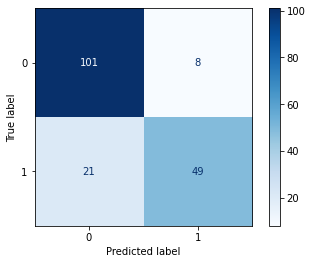

In [58]:
from sklearn.linear_model import RidgeClassifier
rc =RidgeClassifier()
model0=rc.fit(x_train, y_train)
print("train accuracy:",model0.score(x_train, y_train),"\n","test accuracy:",model0.score(x_test,y_test))
rcpred = rc.predict(x_test)
print("\n")
print("classification report for logistic regression")
print(classification_report(rcpred,y_test))
print("\n")
print("confusion matrix for logistic regression")
displr = plot_confusion_matrix(rc, x_test, y_test,cmap=plt.cm.Blues , values_format='d')

#### <u> logistic regression</u>

train accuracy: 0.7949438202247191 
 test accuracy: 0.8491620111731844


classification report for logistic regression
              precision    recall  f1-score   support

           0       0.93      0.84      0.88       120
           1       0.73      0.86      0.79        59

    accuracy                           0.85       179
   macro avg       0.83      0.85      0.84       179
weighted avg       0.86      0.85      0.85       179



confusion matrix for logistic regression


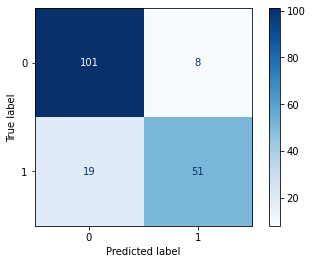

In [59]:
#logistic regression
lr = LogisticRegression(max_iter=2000,penalty='l2')
model1=lr.fit(x_train, y_train)
print("train accuracy:",model1.score(x_train, y_train),"\n","test accuracy:",model1.score(x_test,y_test))
lrpred = lr.predict(x_test)
print("\n")
print("classification report for logistic regression")
print(classification_report(lrpred,y_test))
print("\n")
print("confusion matrix for logistic regression")
displr = plot_confusion_matrix(lr, x_test, y_test,cmap=plt.cm.Blues , values_format='d')

#### <u> linear discriminant analysis</u>

train accuracy: 0.7907303370786517 
 test accuracy: 0.8379888268156425


classification report for linear discriminant analysis
              precision    recall  f1-score   support

           0       0.93      0.83      0.87       122
           1       0.70      0.86      0.77        57

    accuracy                           0.84       179
   macro avg       0.81      0.84      0.82       179
weighted avg       0.85      0.84      0.84       179



confusion matrix for linear discriminant analysis


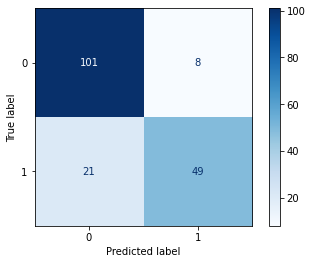

In [60]:
#linear discriminant analysis
lda = LinearDiscriminantAnalysis()
model2=lda.fit(x_train, y_train)
print("train accuracy:",model2.score(x_train, y_train),"\n","test accuracy:",model2.score(x_test,y_test))

ldapred = lda.predict(x_test)
print("\n")
print("classification report for linear discriminant analysis")
print(classification_report(ldapred,y_test))
print("\n")
print("confusion matrix for linear discriminant analysis")
displr = plot_confusion_matrix(lda, x_test, y_test ,cmap=plt.cm.Blues , values_format='d')

#### <u>decision tree classifier </u>

train accuracy: 0.9831460674157303 
 test accuracy: 0.8044692737430168


classification report for decision tree classifier
              precision    recall  f1-score   support

           0       0.83      0.84      0.84       108
           1       0.76      0.75      0.75        71

    accuracy                           0.80       179
   macro avg       0.80      0.79      0.80       179
weighted avg       0.80      0.80      0.80       179



confusion matrix for decision tree classifier


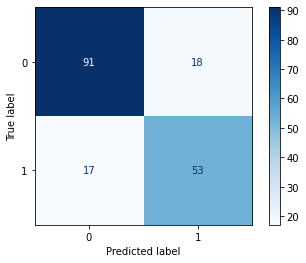

In [61]:
#decision tree classifier
dt=DecisionTreeClassifier()
model3=dt.fit(x_train, y_train)
print("train accuracy:",model3.score(x_train, y_train),"\n","test accuracy:",model3.score(x_test,y_test))

dtpred = dt.predict(x_test)
print("\n")
print("classification report for decision tree classifier")
print(classification_report(dtpred,y_test))
print("\n")
print("confusion matrix for decision tree classifier")
displr = plot_confusion_matrix(dt, x_test, y_test ,cmap=plt.cm.Blues , values_format='d')

#### <u>random forest classifier </u>

train accuracy: 0.9831460674157303 
 test accuracy: 0.8156424581005587


classification report for random forest classifier
              precision    recall  f1-score   support

           0       0.86      0.84      0.85       112
           1       0.74      0.78      0.76        67

    accuracy                           0.82       179
   macro avg       0.80      0.81      0.80       179
weighted avg       0.82      0.82      0.82       179



confusion matrix for random forest classifier


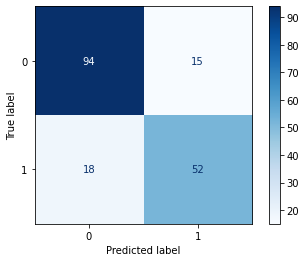

In [62]:
#random forest classifier
rf=RandomForestClassifier(random_state=1234)
model4=rf.fit(x_train, y_train)
print("train accuracy:",model4.score(x_train, y_train),"\n","test accuracy:",model4.score(x_test,y_test))

rfpred = rf.predict(x_test)
print("\n")
print("classification report for random forest classifier")
print(classification_report(rfpred,y_test))
print("\n")
print("confusion matrix for random forest classifier")
displr = plot_confusion_matrix(rf, x_test, y_test ,cmap=plt.cm.Blues , values_format='d')

#### <u>gradient boost classifier  </u>

train accuracy: 0.9087078651685393 
 test accuracy: 0.8268156424581006


classification report for gradient boosting classifier
              precision    recall  f1-score   support

           0       0.92      0.82      0.87       122
           1       0.69      0.84      0.76        57

    accuracy                           0.83       179
   macro avg       0.80      0.83      0.81       179
weighted avg       0.84      0.83      0.83       179



confusion matrix for gradient boosting classifier


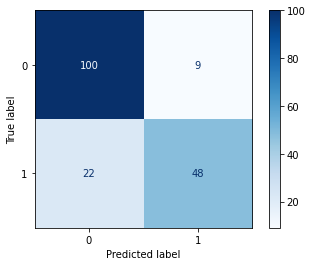

In [63]:
# gradient boost classifier 
gbm=GradientBoostingClassifier()
model5=gbm.fit(x_train, y_train)
print("train accuracy:",model5.score(x_train, y_train),"\n","test accuracy:",model5.score(x_test,y_test))

gbmpred = gbm.predict(x_test)
print("\n")
print("classification report for gradient boosting classifier")
print(classification_report(gbmpred,y_test))
print("\n")
print("confusion matrix for gradient boosting classifier")
displr = plot_confusion_matrix(gbm, x_test, y_test ,cmap=plt.cm.Blues , values_format='d')

#### <u>adaboost classifier  </u>

train accuracy: 0.8314606741573034 
 test accuracy: 0.8156424581005587


classification report for adaboost classifier
              precision    recall  f1-score   support

           0       0.86      0.84      0.85       112
           1       0.74      0.78      0.76        67

    accuracy                           0.82       179
   macro avg       0.80      0.81      0.80       179
weighted avg       0.82      0.82      0.82       179



confusion matrix for adaboost classifier


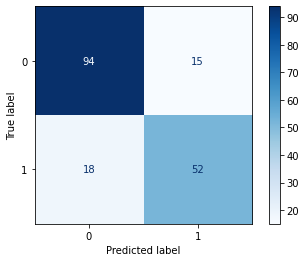

In [64]:
# adaboost classifier 
ada=AdaBoostClassifier()
model6=ada.fit(x_train, y_train)
print("train accuracy:",model6.score(x_train, y_train),"\n","test accuracy:",model6.score(x_test,y_test))

adapred = ada.predict(x_test)
print("\n")
print("classification report for adaboost classifier")
print(classification_report(adapred,y_test))
print("\n")
print("confusion matrix for adaboost classifier")
displr = plot_confusion_matrix(ada, x_test, y_test ,cmap=plt.cm.Blues , values_format='d')

#### <u>extreme gradient boost classifier </u>

[04:27:18] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
train accuracy: 0.9747191011235955 
 test accuracy: 0.8435754189944135


classification report for extreme gradient boosting classifier
              precision    recall  f1-score   support

           0       0.87      0.87      0.87       109
           1       0.80      0.80      0.80        70

    accuracy                           0.84       179
   macro avg       0.84      0.84      0.84       179
weighted avg       0.84      0.84      0.84       179



confusion matrix for extreme gradient boosting classifier


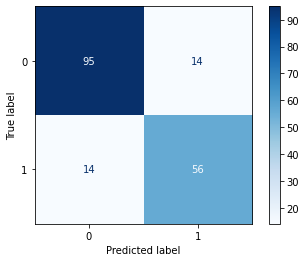

In [65]:
# extreme gradient boost classifier
xgb = XGBClassifier(random_state=1234)
model7=xgb.fit(x_train.values, y_train)
print("train accuracy:",model7.score(x_train, y_train),"\n","test accuracy:",model7.score(x_test,y_test))

xgbpred = xgb.predict(x_test.values)
print("\n")
print("classification report for extreme gradient boosting classifier")
print(classification_report(xgbpred,y_test))
print("\n")
print("confusion matrix for extreme gradient boosting classifier")
displr = plot_confusion_matrix(xgb, x_test.values, y_test ,cmap=plt.cm.Blues , values_format='d')

#### <u>extra tree classifier</u>

train accuracy: 0.9831460674157303 
 test accuracy: 0.8156424581005587


classification report for extra tree classifier
              precision    recall  f1-score   support

           0       0.86      0.84      0.85       112
           1       0.74      0.78      0.76        67

    accuracy                           0.82       179
   macro avg       0.80      0.81      0.80       179
weighted avg       0.82      0.82      0.82       179



confusion matrix for extra tree classifier


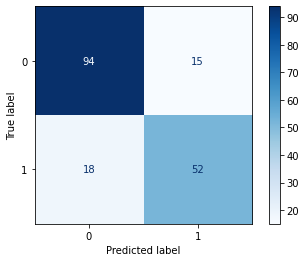

In [66]:
# extra tree classifier
extree = ExtraTreesClassifier()
model8=extree.fit(x_train, y_train)
print("train accuracy:",model8.score(x_train, y_train),"\n","test accuracy:",model8.score(x_test,y_test))

extpred = extree.predict(x_test)
print("\n")
print("classification report for extra tree classifier")
print(classification_report(extpred,y_test))
print("\n")
print("confusion matrix for extra tree classifier")
displr = plot_confusion_matrix(extree, x_test, y_test ,cmap=plt.cm.Blues , values_format='d')

#### <u>voting classifier</u>

train accuracy: 0.9269662921348315 
 test accuracy: 0.8659217877094972


classification report for voting classifier
              precision    recall  f1-score   support

           0       0.93      0.86      0.89       117
           1       0.77      0.87      0.82        62

    accuracy                           0.87       179
   macro avg       0.85      0.87      0.86       179
weighted avg       0.87      0.87      0.87       179



confusion matrix for voting classifier


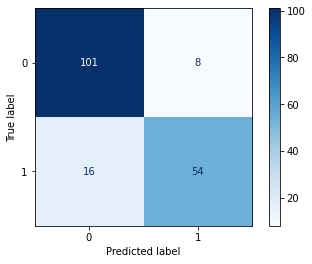

In [67]:
# voting classifer
from sklearn.ensemble import VotingClassifier
clf1 = RandomForestClassifier(random_state=1234)
clf2 = LogisticRegression(max_iter=2000,penalty='l2')

vc = VotingClassifier(estimators=[('xgb', clf1),('lr', clf2)], voting='soft')
model9=vc.fit(x_train, y_train)
print("train accuracy:",model9.score(x_train, y_train),"\n","test accuracy:",model9.score(x_test,y_test))

vcpred = vc.predict(x_test)
print("\n")
print("classification report for voting classifier")
print(classification_report(vcpred,y_test))
print("\n")
print("confusion matrix for voting classifier")
displr = plot_confusion_matrix(vc, x_test, y_test ,cmap=plt.cm.Blues, values_format='d')

#### <u>stacking classifier</u>

train accuracy: 0.9466292134831461 
 test accuracy: 0.8715083798882681


classification report for voting classifier
              precision    recall  f1-score   support

           0       0.94      0.86      0.90       118
           1       0.77      0.89      0.82        61

    accuracy                           0.87       179
   macro avg       0.85      0.87      0.86       179
weighted avg       0.88      0.87      0.87       179



confusion matrix for voting classifier


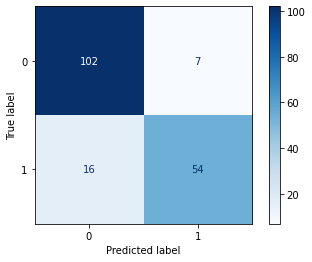

In [68]:
# stacking classifier 
from sklearn.ensemble import StackingClassifier
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

estimators = [('rf', RandomForestClassifier(random_state=1234)),('ext', make_pipeline(LogisticRegression(max_iter=2000,penalty='l2')))]
sc= StackingClassifier( estimators=estimators)

model10=sc.fit(x_train, y_train)
print("train accuracy:",model10.score(x_train, y_train),"\n","test accuracy:",model10.score(x_test,y_test))

scpred = sc.predict(x_test)
print("\n")
print("classification report for voting classifier")
print(classification_report(scpred,y_test))
print("\n")
print("confusion matrix for voting classifier")
displr = plot_confusion_matrix(sc, x_test, y_test ,cmap=plt.cm.Blues , values_format='d')

#### <u>catboost classifier</u>

train accuracy: 0.9044943820224719 
 test accuracy: 0.8547486033519553


classification report for extra tree classifier
              precision    recall  f1-score   support

           0       0.94      0.84      0.89       121
           1       0.73      0.88      0.80        58

    accuracy                           0.85       179
   macro avg       0.83      0.86      0.84       179
weighted avg       0.87      0.85      0.86       179



confusion matrix for extra tree classifier


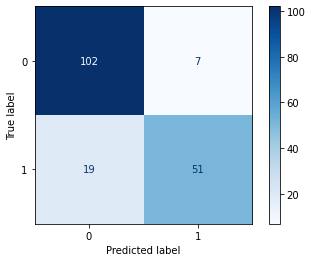

In [69]:
from catboost import CatBoostClassifier

cc = CatBoostClassifier(silent=True )
model11=cc.fit(x_train, y_train)
print("train accuracy:",model11.score(x_train, y_train),"\n","test accuracy:",model11.score(x_test,y_test))

ccpred = cc.predict(x_test)
print("\n")
print("classification report for extra tree classifier")
print(classification_report(ccpred,y_test))
print("\n")
print("confusion matrix for extra tree classifier")
displr = plot_confusion_matrix(cc, x_test, y_test ,cmap=plt.cm.Blues , values_format='d')

## <p style="background-color:#BCDBF9;color:black;font-size:19px;text-align:center;border-radius:12px 10px;border:2px solid blue;"> 🌌 resampling with SMOTE</p>

<font size="4" color="black"> The response variable is imbalanced hence I will use SMOTE to resample the dataset. </font>

In [70]:
from imblearn.over_sampling import SMOTE

oversample = SMOTE()
x_train1, y_train1 = oversample.fit_resample(x_train, y_train)

#### response variable after oversampling

<AxesSubplot:xlabel='Survived', ylabel='count'>

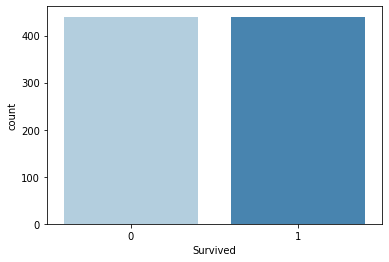

In [71]:
sns.countplot(y_train1,palette='Blues')

#### <u>logistic regression with resampling</u>

train accuracy: 0.8 
 test accuracy: 0.8324022346368715


classification report for logistic regression
              precision    recall  f1-score   support

           0       0.88      0.85      0.86       113
           1       0.76      0.80      0.78        66

    accuracy                           0.83       179
   macro avg       0.82      0.83      0.82       179
weighted avg       0.84      0.83      0.83       179



confusion matrix for logistic regression


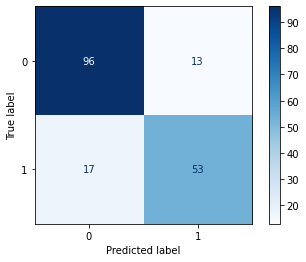

In [72]:
#logistic regression with resampling
lrw = LogisticRegression(max_iter=20000,penalty='l2')
model12=lrw.fit(x_train1, y_train1)
print("train accuracy:",model12.score(x_train1, y_train1),"\n","test accuracy:",model12.score(x_test,y_test))
lrwpred = lrw.predict(x_test)
print("\n")
print("classification report for logistic regression")
print(classification_report(lrwpred,y_test))
print("\n")
print("confusion matrix for logistic regression")
displr = plot_confusion_matrix(lrw, x_test, y_test ,cmap=plt.cm.Blues , values_format='d')

#### <u>linear discriminant analysis with resampling</u>

train accuracy: 0.8011363636363636 
 test accuracy: 0.8156424581005587


classification report for linear discriminant analysis
              precision    recall  f1-score   support

           0       0.89      0.82      0.85       118
           1       0.70      0.80      0.75        61

    accuracy                           0.82       179
   macro avg       0.79      0.81      0.80       179
weighted avg       0.83      0.82      0.82       179



confusion matrix for linear discriminant analysis


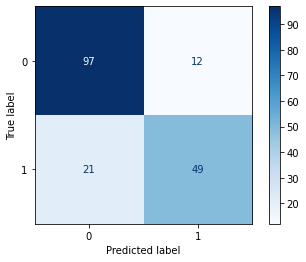

In [73]:
#linear discriminant analysis
ldaw = LinearDiscriminantAnalysis()
model13=ldaw.fit(x_train1, y_train1)
print("train accuracy:",model13.score(x_train1, y_train1),"\n","test accuracy:",model13.score(x_test,y_test))

ldawpred = ldaw.predict(x_test)
print("\n")
print("classification report for linear discriminant analysis")
print(classification_report(ldawpred,y_test))
print("\n")
print("confusion matrix for linear discriminant analysis")
displr = plot_confusion_matrix(ldaw, x_test, y_test ,cmap=plt.cm.Blues , values_format='d')

#### <u>decision tree classifier with resampling</u>

train accuracy: 0.9863636363636363 
 test accuracy: 0.7988826815642458


classification report for decision tree classifier
              precision    recall  f1-score   support

           0       0.85      0.82      0.84       113
           1       0.71      0.76      0.74        66

    accuracy                           0.80       179
   macro avg       0.78      0.79      0.79       179
weighted avg       0.80      0.80      0.80       179



confusion matrix for decision tree classifier


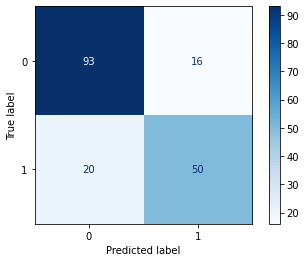

In [74]:
#decision tree classifier
dtw=DecisionTreeClassifier()
model14=dtw.fit(x_train1, y_train1)
print("train accuracy:",model14.score(x_train1, y_train1),"\n","test accuracy:",model14.score(x_test,y_test))

dtwpred = dtw.predict(x_test)
print("\n")
print("classification report for decision tree classifier")
print(classification_report(dtwpred,y_test))
print("\n")
print("confusion matrix for decision tree classifier")
displr = plot_confusion_matrix(dtw, x_test, y_test ,cmap=plt.cm.Blues , values_format='d')

#### <u>RandomForest Classifier with resampling</u>

train accuracy: 0.9863636363636363 
 test accuracy: 0.8268156424581006


classification report for random forest classifier
              precision    recall  f1-score   support

           0       0.86      0.85      0.86       110
           1       0.77      0.78      0.78        69

    accuracy                           0.83       179
   macro avg       0.82      0.82      0.82       179
weighted avg       0.83      0.83      0.83       179



confusion matrix for random forest classifier


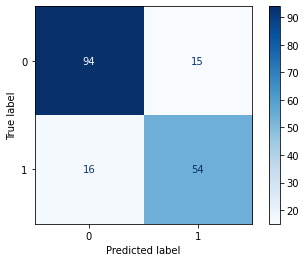

In [75]:
rfw=RandomForestClassifier()
model15=rfw.fit(x_train1, y_train1)
print("train accuracy:",model15.score(x_train1, y_train1),"\n","test accuracy:",model15.score(x_test,y_test))

rfwpred = rfw.predict(x_test)
print("\n")
print("classification report for random forest classifier")
print(classification_report(rfwpred,y_test))
print("\n")
print("confusion matrix for random forest classifier")
displr = plot_confusion_matrix(rfw, x_test, y_test ,cmap=plt.cm.Blues, values_format='d')

#### <u>Bagging Classifier with resampling</u>

train accuracy: 0.975 
 test accuracy: 0.8324022346368715


classification report for bagging classifier
              precision    recall  f1-score   support

           0       0.87      0.86      0.86       111
           1       0.77      0.79      0.78        68

    accuracy                           0.83       179
   macro avg       0.82      0.82      0.82       179
weighted avg       0.83      0.83      0.83       179



confusion matrix for bagging classifier


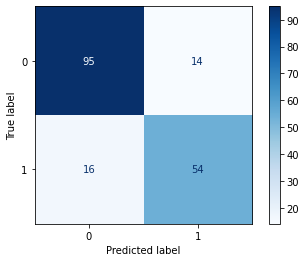

In [76]:
bgw=BaggingClassifier()
model16=bgw.fit(x_train1, y_train1)
print("train accuracy:",model16.score(x_train1, y_train1),"\n","test accuracy:",model16.score(x_test,y_test))

bgwpred = bgw.predict(x_test)
print("\n")
print("classification report for bagging classifier")
print(classification_report(bgwpred,y_test))
print("\n")
print("confusion matrix for bagging classifier")
displr = plot_confusion_matrix(bgw, x_test, y_test ,cmap=plt.cm.Blues , values_format='d')

#### <u>Gradient boosting classifier with resampling</u>

train accuracy: 0.9034090909090909 
 test accuracy: 0.8324022346368715


classification report for gradient boosting classifier
              precision    recall  f1-score   support

           0       0.89      0.84      0.87       115
           1       0.74      0.81      0.78        64

    accuracy                           0.83       179
   macro avg       0.82      0.83      0.82       179
weighted avg       0.84      0.83      0.83       179



confusion matrix for gradient boosting classifier


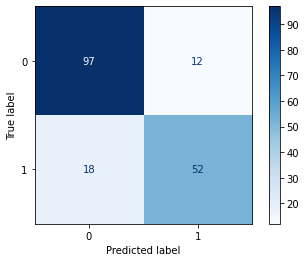

In [77]:
gbmw=GradientBoostingClassifier()
model17=gbmw.fit(x_train1, y_train1)
print("train accuracy:",model17.score(x_train1, y_train1),"\n","test accuracy:",model17.score(x_test,y_test))

gbmwpred = gbmw.predict(x_test)
print("\n")
print("classification report for gradient boosting classifier")
print(classification_report(gbmwpred,y_test))
print("\n")
print("confusion matrix for gradient boosting classifier")
displr = plot_confusion_matrix(gbmw, x_test, y_test ,cmap=plt.cm.Blues, values_format='d')

#### <u>Ada boosting classifier with resampling</u>

train accuracy: 0.8375 
 test accuracy: 0.8212290502793296


classification report for adaboost classifier
              precision    recall  f1-score   support

           0       0.86      0.85      0.85       111
           1       0.76      0.78      0.77        68

    accuracy                           0.82       179
   macro avg       0.81      0.81      0.81       179
weighted avg       0.82      0.82      0.82       179



confusion matrix for adaboost classifier


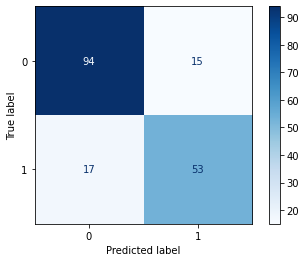

In [78]:
adaw=AdaBoostClassifier()
model18=adaw.fit(x_train1, y_train1)
print("train accuracy:",model18.score(x_train1, y_train1),"\n","test accuracy:",model18.score(x_test,y_test))

adawpred = adaw.predict(x_test)
print("\n")
print("classification report for adaboost classifier")
print(classification_report(adawpred,y_test))
print("\n")
print("confusion matrix for adaboost classifier")
displr = plot_confusion_matrix(adaw, x_test, y_test ,cmap=plt.cm.Blues , values_format='d')

#### <u>Extreme gradient boosting classifier with resampling</u>

[04:27:35] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
train accuracy: 0.9806818181818182 
 test accuracy: 0.8491620111731844


classification report for extreme gradient boosting classifier
              precision    recall  f1-score   support

           0       0.90      0.86      0.88       114
           1       0.77      0.83      0.80        65

    accuracy                           0.85       179
   macro avg       0.84      0.85      0.84       179
weighted avg       0.85      0.85      0.85       179



confusion matrix for extreme gradient boosting classifier


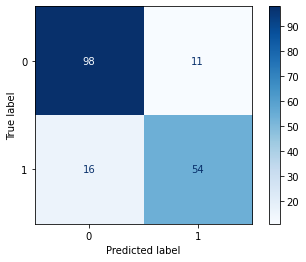

In [79]:
xgbw = XGBClassifier()
model19=xgbw.fit(x_train1.values, y_train1)
print("train accuracy:",model19.score(x_train1, y_train1),"\n","test accuracy:",model19.score(x_test,y_test))

xgbwpred = xgbw.predict(x_test.values)
print("\n")
print("classification report for extreme gradient boosting classifier")
print(classification_report(xgbwpred,y_test))
print("\n")
print("confusion matrix for extreme gradient boosting classifier")
displr = plot_confusion_matrix(xgbw, x_test.values, y_test ,cmap=plt.cm.Blues, values_format='d')

#### <u>Extra tree classifier with resampling</u>

train accuracy: 0.9863636363636363 
 test accuracy: 0.8156424581005587


classification report for extra tree classifier
              precision    recall  f1-score   support

           0       0.84      0.85      0.85       108
           1       0.77      0.76      0.77        71

    accuracy                           0.82       179
   macro avg       0.81      0.81      0.81       179
weighted avg       0.82      0.82      0.82       179



confusion matrix for extra tree classifier


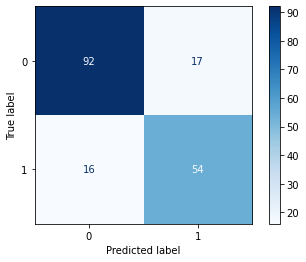

In [80]:
extreew = ExtraTreesClassifier()
model20=extreew.fit(x_train1, y_train1)
print("train accuracy:",model20.score(x_train1, y_train1),"\n","test accuracy:",model20.score(x_test,y_test))

extwpred = extreew.predict(x_test)
print("\n")
print("classification report for extra tree classifier")
print(classification_report(extwpred,y_test))
print("\n")
print("confusion matrix for extra tree classifier")
displr = plot_confusion_matrix(extreew, x_test, y_test ,cmap=plt.cm.Blues , values_format='d')

#### <u>Voting classifier with resampling</u>

train accuracy: 0.9238636363636363 
 test accuracy: 0.8491620111731844


classification report for voting classifier
              precision    recall  f1-score   support

           0       0.90      0.86      0.88       114
           1       0.77      0.83      0.80        65

    accuracy                           0.85       179
   macro avg       0.84      0.85      0.84       179
weighted avg       0.85      0.85      0.85       179



confusion matrix for voting classifier


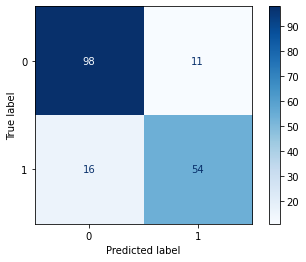

In [81]:
clf1 = LogisticRegression(max_iter=2000,penalty='l2')
clf2 = RandomForestClassifier()

vcw = VotingClassifier(estimators=[('lr', clf1),('rf', clf2)], voting='soft')
model21=vcw.fit(x_train1, y_train1)
print("train accuracy:",model21.score(x_train1, y_train1),"\n","test accuracy:",model21.score(x_test,y_test))

vcwpred = vcw.predict(x_test)
print("\n")
print("classification report for voting classifier")
print(classification_report(vcwpred,y_test))
print("\n")
print("confusion matrix for voting classifier")
displr = plot_confusion_matrix(vcw, x_test, y_test ,cmap=plt.cm.Blues , values_format='d')

#### <u>Stacking classifier with resampling</u>

train accuracy: 0.9488636363636364 
 test accuracy: 0.8379888268156425


classification report for voting classifier
              precision    recall  f1-score   support

           0       0.88      0.86      0.87       112
           1       0.77      0.81      0.79        67

    accuracy                           0.84       179
   macro avg       0.83      0.83      0.83       179
weighted avg       0.84      0.84      0.84       179



confusion matrix for voting classifier


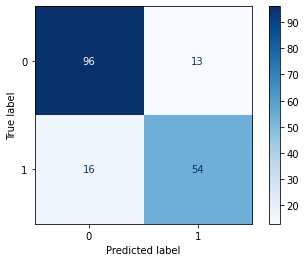

In [82]:
estimators = [('rf', RandomForestClassifier(n_estimators=10, random_state=2)),('ext', make_pipeline(StandardScaler(),  LogisticRegression(max_iter=2000,penalty='l2')))]
scw= StackingClassifier( estimators=estimators, final_estimator=LogisticRegression())

model22=scw.fit(x_train1, y_train1)
print("train accuracy:",model22.score(x_train1, y_train1),"\n","test accuracy:",model22.score(x_test,y_test))

scwpred = scw.predict(x_test)
print("\n")
print("classification report for voting classifier")
print(classification_report(scwpred,y_test))
print("\n")
print("confusion matrix for voting classifier")
displr = plot_confusion_matrix(scw, x_test, y_test ,cmap=plt.cm.Blues , values_format='d')

<font size="4" color="black">From the above fitted models stacking classifier has given the best classification accuracy. The performance was not increased by using SMOTE resampling. So the best model is<span style="color:blue;"> stacking classifier without resampling with 87.15% accuracy.</span></font>

#### <b>Hyperparameter tuning ......</b>

In [83]:
import optuna
import sklearn

def objective(trial):
    
    n_estimators = trial.suggest_int('n_estimators', 2, 2000)
    max_depth =  trial.suggest_int('max_depth', 1, 20)
    clf = sklearn.ensemble.RandomForestClassifier(n_estimators=n_estimators, max_depth=max_depth)
    return sklearn.model_selection.cross_val_score(clf, X,y,n_jobs=-1,cv=6).mean()

In [84]:
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=150)

[I 2022-01-19 04:27:41,654] A new study created in memory with name: no-name-cc43345a-56f1-45fe-887a-ffac9d49f1ea
[I 2022-01-19 04:27:48,389] Trial 0 finished with value: 0.8159350625793579 and parameters: {'n_estimators': 804, 'max_depth': 3}. Best is trial 0 with value: 0.8159350625793579.
[I 2022-01-19 04:27:50,287] Trial 1 finished with value: 0.8248836084406554 and parameters: {'n_estimators': 308, 'max_depth': 4}. Best is trial 1 with value: 0.8248836084406554.
[I 2022-01-19 04:27:51,295] Trial 2 finished with value: 0.823787713888385 and parameters: {'n_estimators': 179, 'max_depth': 7}. Best is trial 1 with value: 0.8248836084406554.
[I 2022-01-19 04:27:52,520] Trial 3 finished with value: 0.7665744603664066 and parameters: {'n_estimators': 243, 'max_depth': 1}. Best is trial 1 with value: 0.8248836084406554.
[I 2022-01-19 04:28:02,920] Trial 4 finished with value: 0.8271812080536912 and parameters: {'n_estimators': 1808, 'max_depth': 11}. Best is trial 4 with value: 0.82718120

In [85]:
trial = study.best_trial
print('Accuracy: {}'.format(trial.value))

Accuracy: 0.8372634379345788


In [86]:
print("Best hyperparameters: {}".format(trial.params))

Best hyperparameters: {'n_estimators': 1672, 'max_depth': 9}


train accuracy: 0.9199438202247191 
 test accuracy: 0.8547486033519553


classification report for voting classifier
              precision    recall  f1-score   support

           0       0.93      0.85      0.89       119
           1       0.74      0.87      0.80        60

    accuracy                           0.85       179
   macro avg       0.83      0.86      0.84       179
weighted avg       0.87      0.85      0.86       179



confusion matrix for voting classifier


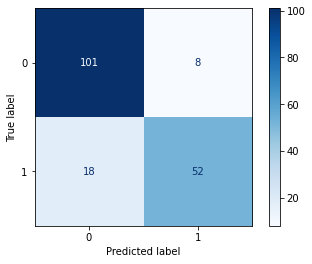

In [87]:
# stacking classifier with tuned hyper parameters 
from sklearn.ensemble import StackingClassifier
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

estimators = [('rf', RandomForestClassifier(random_state=1234,n_estimators=776,max_depth=9)),('ext', make_pipeline(LogisticRegression(max_iter=2000,penalty='l2')))]
sc1= StackingClassifier( estimators=estimators)

modelt=sc1.fit(x_train, y_train)
print("train accuracy:",modelt.score(x_train, y_train),"\n","test accuracy:",modelt.score(x_test,y_test))

sctpred = sc1.predict(x_test)
print("\n")
print("classification report for voting classifier")
print(classification_report(sctpred,y_test))
print("\n")
print("confusion matrix for voting classifier")
displr = plot_confusion_matrix(sc1, x_test, y_test ,cmap=plt.cm.Blues , values_format='d')

<font size="4" color="black">Now let's fit a simple neural network using AutoKeras.</font>

##  <p style="background-color:#BCDBF9;color:black;font-size:19px;text-align:center;border-radius:12px 10px;border:2px solid blue;">🧊 Neural network with AutoKeras </p>

In [88]:
!pip install autokeras

     |████████████████████████████████| 166 kB 917 kB/s 
     |████████████████████████████████| 454.4 MB 17 kB/s 
     |████████████████████████████████| 4.0 MB 47.7 MB/s 
     |████████████████████████████████| 462 kB 65.2 MB/s 
     |████████████████████████████████| 1.2 MB 48.3 MB/s 
  Attempting uninstall: typing-extensions
    Found existing installation: typing-extensions 3.10.0.2
    Uninstalling typing-extensions-3.10.0.2:
      Successfully uninstalled typing-extensions-3.10.0.2
  Attempting uninstall: six
    Found existing installation: six 1.16.0
    Uninstalling six-1.16.0:
      Successfully uninstalled six-1.16.0
  Attempting uninstall: grpcio
    Found existing installation: grpcio 1.38.1
    Uninstalling grpcio-1.38.1:
      Successfully uninstalled grpcio-1.38.1
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.6.0
    Uninstalling tensorflow-estimator-2.6.0:
      Successfully uninstalled tensorflow-estimator-2.6.0


In [89]:
import tensorflow as tf
import autokeras as ak

2022-01-19 04:49:33.101783: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: 
2022-01-19 04:49:33.101897: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [90]:
x_train=x_train.to_numpy()
x_test=x_test.to_numpy()
y_train=y_train.to_numpy()
y_test=y_test.to_numpy()

#### training network for 30 epochs. Here AutoKeras will try 4 different neural networks.

In [91]:
clf = ak.StructuredDataClassifier(max_trials=4,seed=1234)
# Feed the structured data classifier with training data.
clf.fit(x_train, y_train, epochs=30, validation_split=0.2)
# Predict with the best model.
predicted_y = clf.predict(x_test)
# Evaluate the best model with testing data.
print(clf.evaluate(x_test, y_test))

Trial 4 Complete [00h 00m 06s]
val_accuracy: 0.8461538553237915

Best val_accuracy So Far: 0.8557692170143127
Total elapsed time: 00h 00m 22s
Epoch 1/30
23/23 [==============================] - 1s 2ms/step - loss: 0.6686 - accuracy: 0.6067
Epoch 2/30
23/23 [==============================] - 0s 2ms/step - loss: 0.5843 - accuracy: 0.7851
Epoch 3/30
23/23 [==============================] - 0s 2ms/step - loss: 0.5259 - accuracy: 0.8090
Epoch 4/30
23/23 [==============================] - 0s 2ms/step - loss: 0.4833 - accuracy: 0.8104
Epoch 5/30
23/23 [==============================] - 0s 2ms/step - loss: 0.4570 - accuracy: 0.8104
Epoch 6/30
23/23 [==============================] - 0s 2ms/step - loss: 0.4437 - accuracy: 0.8104
Epoch 7/30
23/23 [==============================] - 0s 2ms/step - loss: 0.4358 - accuracy: 0.8104
Epoch 8/30
23/23 [==============================] - 0s 2ms/step - loss: 0.4299 - accuracy: 0.8132
Epoch 9/30
23/23 [==============================] - 0s 2ms/step - loss: 0.

2022-01-19 04:50:06.931676: W tensorflow/python/util/util.cc:348] Sets are not currently considered sequences, but this may change in the future, so consider avoiding using them.


6/6 [==============================] - 0s 2ms/step - loss: 0.4012 - accuracy: 0.8436
[0.4011738896369934, 0.8435754179954529]


#### export the best model .... 🥈

In [92]:
model = clf.export_model()
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 8)]               0         
_________________________________________________________________
multi_category_encoding (Mul (None, 8)                 0         
_________________________________________________________________
normalization (Normalization (None, 8)                 17        
_________________________________________________________________
dense (Dense)                (None, 32)                288       
_________________________________________________________________
re_lu (ReLU)                 (None, 32)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 32)                1056      
_________________________________________________________________
re_lu_1 (ReLU)               (None, 32)                0     

In [93]:
predicted = clf.predict(x_test)

6/6 [==============================] - 0s 2ms/step


In [94]:
print("classification report for neural network")
print(classification_report(predicted,y_test))

classification report for neural network
              precision    recall  f1-score   support

         0.0       0.96      0.81      0.88       129
         1.0       0.66      0.92      0.77        50

    accuracy                           0.84       179
   macro avg       0.81      0.87      0.82       179
weighted avg       0.88      0.84      0.85       179



<font size="4" color="black">This could not outperformed the voting classifier.</font>

## <p style="background-color:#BCDBF9;color:black;font-size:19px;text-align:center;border-radius:12px 10px;border:2px solid blue;">💎  Results </p>

<font size="4" color="black">From the all above models stacking classifier with random forest classifier and logistic regression have higher perfromance than other models. <span style="color:blue;">stacking classifier achieved the highest classification accuracy 87.15%.</span> We can see that without resampling there is a slight increase in accuracy. hence the model without SMOTE resampling is the best one. The accuracy can be increased by tuning hyper parameters of these models.</font>

## <p style="background-color:#BCDBF9;color:black;font-size:19px;text-align:center;border-radius:12px 10px;border:2px solid blue;">🧿 Submission </p>

In [95]:
results=sc.predict(test)

In [96]:
df_submission = pd.read_csv('/kaggle/input/titanic/gender_submission.csv')
df_submission['Survived']=results
df_submission.to_csv('submission.csv',index=False)

In [97]:
df_submission.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1


<center><p style="color:blue;font-size:17px;border:2px solid blue;border-radius:12px 10px;text-align:center;"><b>Highly appreciate your questions or feedback related to this notebook.If you liked this Notebook, please do <span style="color:gold;">upvote</span>. THANK YOU <span style='font-size:22px;'>&#128522;</span></b> </p></center>


<center><img src="https://media.giphy.com/media/cPeVtqO2TPYfhaLPhY/giphy.gif" style="width:500px;height:280px;"></center>